In [10]:
%matplotlib widget

In [1]:
%cd ..

d:\Users\NitroPC\Documents\Python\ConcursoModelizacion2023


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from gradient_descent import Environment, Agent, ConstrainedLoss, CostLoss, DistanceLoss, optimize
from utils import plot_location

In [3]:
K=35
dt = 1.
g = 0.1
m = 10.
F_max = 11.
p_0 = np.array([50., 50., 100.])
v_0 = np.array([-10., 0., -10.])
alpha = 0.5
gamma = 1.

In [4]:
agent = Agent(K)
env = Environment(dt, gamma, g, m, p_0, v_0)

In [6]:
optim = torch.optim.RMSprop(agent.parameters(), lr=1e-1)
loss = ConstrainedLoss(dt, gamma, F_max, alpha)

In [7]:
optimize(env, agent, loss, optim, iters=200)

72565.375
2597.9208984375
1673.7041015625
1243.0882568359375
1052.253173828125
1032.5316162109375
909.4166870117188
872.53564453125
851.3662109375
827.8510131835938
836.0056762695312
893.5778198242188
849.3534545898438
795.8561401367188
765.6841430664062
840.5131225585938
828.624267578125
766.1212768554688
750.2721557617188
797.0091552734375
787.1595458984375
757.2786865234375
785.9547729492188
798.0972290039062
785.9387817382812
874.8140258789062
763.0073852539062
762.145751953125
741.4716186523438
749.2687377929688
750.2689819335938
786.1358642578125
775.7189331054688
788.7377319335938
745.8085327148438
745.0204467773438
810.9750366210938
793.9002075195312
789.9614868164062
730.35546875
767.4505004882812
751.8760986328125
833.7276000976562
749.9490356445312
742.5341186523438
724.8794555664062
725.5567016601562
743.8220825195312
722.664794921875
783.3458251953125
769.5839233398438
733.1244506835938
761.3758544921875
723.2610473632812
795.5693969726562
751.8603515625
762.0245971679688


In [8]:
p, v = env(agent())

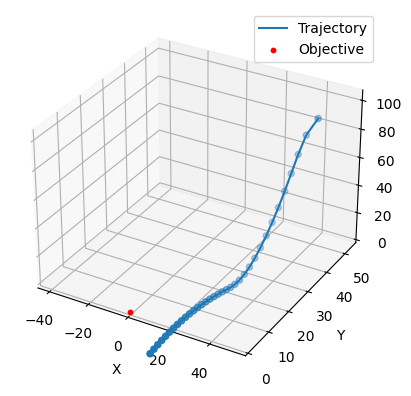

In [9]:
plot_location(p,v)